<a href="https://colab.research.google.com/github/thedatadj/Python_Projects/blob/main/Twitter%20Sentiment%20Analyser/Naive_Sentiment_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Sentiment Classifier

In this project, I construct a naive sentiment classifier using some synthetic (fake, semi-randomly generated) twitter data in a csv file named `project_twitter_data.csv` which has the text of a tweet, the number of retweets of that tweet, and the number of replies to that tweet.

I have also words that express positive sentiment and negative sentiment, in the files `positive_words.txt` and `negative_words.txt`.

### Description

My goal is to build a sentiment classifier, which will detect how positive or negative each tweet is. I will create a csv file, which contains columns for the number of retweets, number of replies, positive core (which is how many happy words are in the tweet), Negative Score (which is how many angry words are in the tweet), and the Net Score for each tweet. At the end, I produce a graph of the Net Score vs Number of Retweets.

This classifier is considered `naive` because it only looks at the frequency of positive and negative words, it doesn't really understand the meaning of the words.

In [87]:
positive = "/content/drive/MyDrive/Colab Notebooks/Projects/PythonProjects/Sentiment Analysis/positive_words.txt.txt"
negative = "/content/drive/MyDrive/Colab Notebooks/Projects/PythonProjects/Sentiment Analysis/negative_words.txt.txt"
twitter_data = "/content/drive/MyDrive/Colab Notebooks/Projects/PythonProjects/Sentiment Analysis/project_twitter_data.csv.txt"

In [88]:
# Data analysis
import pandas as pd

# Data representation
import seaborn as sns

## Preprocessing
I define a function called `strip_punctuation` which takes one parameter, a string which represents a word, and removes characters considered punctuation from everywhere in the word.

In [89]:
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']

def strip_punctuation(word):
    for ch in word:
        if ch in punctuation_chars:
            word = word.replace(ch, "")
    return word

## Positive sentiment
This function returns an integer of how many occurrences there are of positive words in the text.

In [90]:
# list of positive words to use
positive_words = []
with open(positive) as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            positive_words.append(lin.strip())

def get_pos(sentence):
    x = 0
    for word in sentence.split():
        word = strip_punctuation(word)
        word = word.lower()
        if word in positive_words:
            x += 1
    return x

## Negative sentiment
This function returns an integer which is the frequency of negative words in the text.

In [91]:
# list of # list of positive words to use words to use
negative_words = []
with open(negative) as pos_f:
    for lin in pos_f:
        if lin[0] != ';' and lin[0] != '\n':
            negative_words.append(lin.strip())


def get_neg(sentence):
    x = 0
    for word in sentence.split():
        word = strip_punctuation(word)
        word = word.lower()
        if word in negative_words:
            x += 1
    return x

## Save the data

This code opens and read the file `project_twitter_data.csv`, extracts the tweets and then I apply the functions defined above to extract the positive and negative scores.

The I save this information into a csv file called `resulting_data.csv`, which contains the following headers:


<table>
  <th>Number of Retweets</th><th>Number of Replies</th><th>Positive Score</th><th>Negative Score</th><th>Net Score</th>
  <tr>
    <td>2</td><td>1</td><td>2</td><td>1</td><td>1</td>
  </tr>
  <tr>
    <td>3</td><td>5</td><td>0</td><td>3</td><td>-3</td>
  </tr>
  <tr>
    <td></td><td></td><td>&#x22EE</td></td><td></td><td>
  </tr>
</table>



In [92]:
# Open the file to read the data
input = open(twitter_data, "r")

# Create the file to write the resulting data
output = open("resulting_data.csv", "w")


# Write header on output file
header = 'Number of Retweets,Number of Replies,Positive Score,Negative Score,Net Score'
output.write(header)

# Add like breack
output.write('\n')

# Split the file into rows
rows = input.readlines()[1:] # Skip the header

# Separate the columns from each row
rows = [row.split(",") for row in rows]


for row in rows:
    # get the item from each column
    tweet = row[0]
    retweets = row[1]
    replies = row[2][:1]

    # get the scores
    n = get_neg(tweet)
    p = get_pos(tweet)


    # Create new row
    new_row = list(map(lambda x: str(x), [retweets, replies, p, -1*n, p-n]))
    new_row = ",".join(new_row)

    # Save data into file
    output.write(new_row)
    output.write('\n')

# Close files
input.close()
output.close()

In [93]:
twitter_data = pd.read_csv("/content/resulting_data.csv")

In [94]:
twitter_data.head()

,Number of Retweets,Number of Replies,Positive Score,Negative Score,Net Score
0,3,0,0,0,0
1,1,0,2,-2,0
2,1,2,1,0,1
3,3,1,1,0,1
4,6,0,2,0,2


## Graphical representation of results
Here, I graph the Net Score vs the Number of Retweets

<Axes: xlabel='Net Score', ylabel='Number of Retweets'>

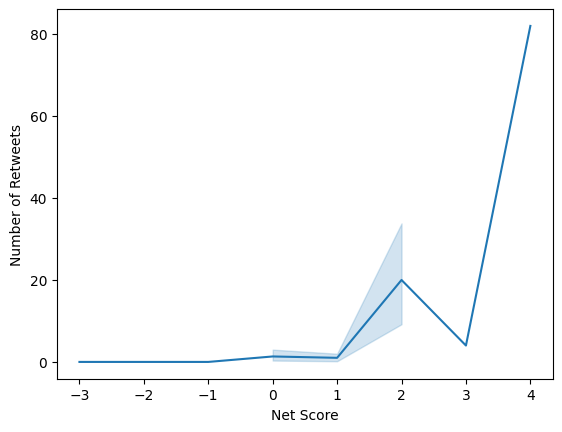

In [97]:
sns.lineplot(twitter_data,
                x='Net Score',
                y='Number of Retweets')

## Conclusion

It seems that the greater the `Net Score` is, the greater the `Number of Retweets`.